In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import csv
import pickle
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from pandas import *
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-cv/data_cv_linked.csv
/kaggle/input/test-cv/data2.txt


In [34]:
FILEPATH = '/kaggle/input/data-cv/data_cv_linked.csv'
df = pd.read_csv(FILEPATH)
labels=df['label'].tolist()
sentences=df['resume'].tolist()
print(sentences[:1])

["\xa0 \xa0\nContact\nwww.linkedin.com/in/sentanu\n(LinkedIn)\nTop Skills\nLaravel\nNestJS\nASP.NET Web APIAriantha Sentanu\nBack End Engineer (Laravel / Node.js / ASP.NET Web API)\nTabanan, Bali, Indonesia\nExperience\nTaksu Tech\nBack End Engineer\nMarch 2018\xa0-\xa0Present\xa0 (5 years 10 months)\nEducation\nUniversitas Udayana\nBachelor's degree,\xa0Computer Science \xa0·\xa0(2013\xa0-\xa02021)\n\xa0 Page 1 of 1\n"]


(68, 2)


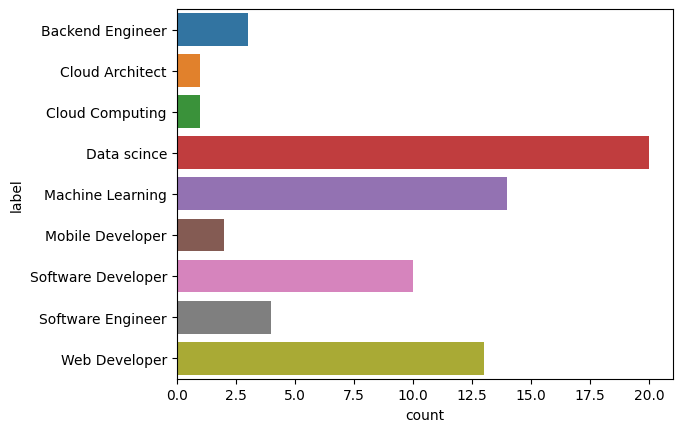

In [35]:
sns.countplot(y="label", data=df)
print(df.shape)

In [36]:
# Preprocess
import re
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words

def removingStopWords(sentence):
    words = [word for word in sentence.split() if word.lower() not in sw_spacy]
    new_text = " ".join(words)
    return new_text

def cleanResume(sentence):
    sentence = re.sub(r'[^\x00-\x7f]',r' ', sentence)
    sentence = re.sub('#\S+', '', sentence)  # remove hashtags
    sentence = re.sub('@\S+', '  ', sentence)  # remove mentions
    sentence = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', sentence)
    sentence = removingStopWords(sentence)
    sentence = re.sub('\s+', ' ', sentence)  # remove extra whitespace
    return sentence

cleaned_sentences = [cleanResume(sentence) for sentence in sentences]


for i in range(len(labels)):
  labels[i] = str(labels[i].lower())
  labels[i] = labels[i].replace(" ", "")
print(cleaned_sentences[1])
print(labels[1])

Contact www linkedin com agus wisnu8 LinkedIn Skills REST APIs TensorFlow Web Development Languages Indonesian Native Bilingual English Professional Working Certifications Tensorflow Developer Certificate Belajar Dasar Dasar DevOps Google Support Google Automation Python Belajar Jaringan Komputer untuk Pemulaagus wisnu Software Developer end Developer Electrical Engineer Computer Engineer Bachelor Machine Learning Data Science enthusiast Summary Fresh Graduate Electrical Engineering Computer Engineer Udayana University Dive deeper end software development Interest data science machine learning Experience Taksu Tech End Developer January 2023 Present 1 year Bali Indonesia Bangkit Academy led Google Tokopedia Gojek Traveloka Bangkit 2021 January 2021 June 2021 6 months Graduated Machine Learning Student keynote support ML Developer TensorFlow Education Universitas Udayana Bachelor Engineering Computer Engineering August 2017 2022 Page 1 1
backendengineer


In [37]:
# Shuffle data
from sklearn.utils import shuffle
labels,cleaned_sentences = shuffle(labels,cleaned_sentences)
print(cleaned_sentences[1])
print(labels[1])

Contact www linkedin com sarah floris LinkedIn Skills Data Warehousing Google Cloud Platform GCP Python Programming Language Languages English Spanish Dutch Certifications Databricks Certified Machine Learning Professional Honors Awards Phi Eta Sigma National Honor Society Presidential Award Academics National Science Foundation Research Undergraduate Experience Alpha Chi National Honor Society University Scholar Publications Cognitive Function Patient Reported Memory Problem Following Radiation Therapy Cancers Skull Base Survivorship Study Telephone Interview Cognitive Status MDASI HN Quantum Molecular Motion Mixed Ion Radical Complex H2O H2S Triosmium carbonyl complexes multiple 1 3 5 triaza 7 phosphaadamantane PTA ligands Synthesis new water soluble Os3 cluster Sarah Floris MS Senior Data ML Platform Engineer dutchengineer substack com Host Ask Data Mentor Podcast Greater Seattle Area Summary Built long term roadmaps data platform machine learning platform Experience designing analy

In [38]:
# Split into train and test
train_split = 0.8
train_size = int(train_split * len(cleaned_sentences))

train_sentences = cleaned_sentences[:train_size]
train_labels = labels[:train_size]

test_sentences = cleaned_sentences[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

54
14


In [39]:
# Tokenize
vocab_size = 6000
max_length = 300
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
label_tokenizer = Tokenizer(lower=True)

# Generate the word index dictionary
tokenizer.fit_on_texts(cleaned_sentences)
word_index = tokenizer.word_index

# Tokenize label
label_tokenizer.fit_on_texts(labels)
labels_index = label_tokenizer.word_index
print(dict(list(labels_index.items())))

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Sequence label
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

# Convert the labels lists into numpy arrays
train_labels_seq = np.array(train_label_sequences)
test_labels_seq = np.array(test_label_sequences)

# sentences
testing_padded = np.array(testing_padded)
training_padded = np.array(training_padded)
print(len(testing_padded[0]))

{'datascince': 1, 'machinelearning': 2, 'webdeveloper': 3, 'softwaredeveloper': 4, 'softwareengineer': 5, 'backendengineer': 6, 'mobiledeveloper': 7, 'cloudarchitect': 8, 'cloudcomputing': 9}
300


In [40]:
# model
embedding_dim = 64
cv_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
cv_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 300, 64)           384000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 256)               197632    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                      

In [42]:
cv_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cv_model.fit(training_padded,train_labels_seq,epochs=50,validation_data=(testing_padded,test_labels_seq))

Epoch 1/50
2/2 [==============================] - 6s 1s/step - loss: 0.4298 - accuracy: 0.8333 - val_loss: 2.5577 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 1s 436ms/step - loss: 0.3248 - accuracy: 0.9074 - val_loss: 2.0320 - val_accuracy: 0.5714
Epoch 3/50
2/2 [==============================] - 1s 437ms/step - loss: 0.4751 - accuracy: 0.8519 - val_loss: 2.0286 - val_accuracy: 0.5714
Epoch 4/50
2/2 [==============================] - 1s 457ms/step - loss: 0.3799 - accuracy: 0.8889 - val_loss: 2.2389 - val_accuracy: 0.4286
Epoch 5/50
2/2 [==============================] - 1s 444ms/step - loss: 0.3819 - accuracy: 0.9074 - val_loss: 2.1089 - val_accuracy: 0.4286
Epoch 6/50
2/2 [==============================] - 1s 431ms/step - loss: 0.4269 - accuracy: 0.8519 - val_loss: 1.8839 - val_accuracy: 0.4286
Epoch 7/50
2/2 [==============================] - 1s 442ms/step - loss: 0.3495 - accuracy: 0.8704 - val_loss: 1.7466 - val_accuracy: 0.5000
Epoch 8/50
2/2 [=======

In [46]:
# saving model
pickle.dump(cv_model,open("cvModel.h5","wb"))

In [26]:
f = open("/kaggle/input/test-cv/data2.txt", "r", encoding='latin-1')
test=f.read()
print(test)

   
Contact
patrickai0309@gmail.com
www.linkedin.com/in/
patrickamadeus  (LinkedIn)
patrickamadeus.github.io
(Personal)
Top Skills
Programming
Problem Solving
Data Science
Languages
Indonesian  (Native or Bilingual)
English  (Full Professional)
Certifications
English Proficiency Certificate
Professional Data Scientist
LangChain for LLM Application
Development
Honors-Awards
[University] 2nd Winner - Canadian
Team Math Competition
[University] 3rd Winner - Calculus
Digital Math Competition
[National] Awardee - Technology
and Science Leadership Academy
Scholarship
[National] Finalist - GEMASTIK XV
(Data Mining)
[International] Awardee - Indonesian
International Student Mobility
Awards @ UC DavisPatrick Amadeus Irawan
CS @ ITB | IISMA '23 @ UC Davis | prev. Blibli, RuangGuru,
Supertype
Jakarta Metropolitan Area
Summary
Passionate about building solutions around Data Science & AI.
Currently learning and gathering pieces to fulfill his childhood
aspiration of bringing a contribution through 

In [27]:
# preprocess test data
test=removingStopWords(test)
test=cleanResume(test)
print(test)

Contact patrickai0309 www linkedin com patrickamadeus LinkedIn patrickamadeus github io Personal Skills Programming Problem Solving Data Science Languages Indonesian Native Bilingual English Professional Certifications English Proficiency Certificate Professional Data Scientist LangChain LLM Application Development Honors Awards University 2nd Winner Canadian Team Math Competition University 3rd Winner Calculus Digital Math Competition National Awardee Technology Science Leadership Academy Scholarship National Finalist GEMASTIK XV Data Mining International Awardee Indonesian International Student Mobility Awards UC DavisPatrick Amadeus Irawan CS ITB IISMA 23 UC Davis prev Blibli RuangGuru Supertype Jakarta Metropolitan Area Summary Passionate building solutions Data Science AI Currently learning gathering pieces fulfill childhood aspiration bringing contribution healthcare technology integration Find patrickamadeus github io Experience Institut Teknologi Bandung Artificial Intelligence

In [28]:
test_sequences = tokenizer.texts_to_sequences(test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_padded = np.array(test_padded)

In [29]:
yPredicted_test=cv_model.predict(test_padded)

98/98 [==============================] - 15s 141ms/step


In [32]:
print(yPredicted_test)
print(yPredicted_test.shape)
predicted_classes = yPredicted_test.argmax(axis=1)
print(predicted_classes)

[[6.81646628e-10 1.29520151e-06 1.24617960e-04 ... 4.52390850e-05
  8.78455292e-04 1.96377914e-06]
 [9.16773601e-10 1.30812850e-06 1.36901901e-04 ... 6.87023858e-05
  1.89213036e-03 2.58884506e-06]
 [7.14257986e-10 1.33451863e-06 1.29831431e-04 ... 4.57904680e-05
  8.84944980e-04 2.00134082e-06]
 ...
 [7.05397463e-10 1.22280824e-06 1.20366785e-04 ... 5.27183729e-05
  1.19112409e-03 2.11397605e-06]
 [6.99556024e-10 1.19409742e-06 1.19084383e-04 ... 5.25442229e-05
  1.20886869e-03 2.07427547e-06]
 [7.05397463e-10 1.22280824e-06 1.20366785e-04 ... 5.27183729e-05
  1.19112397e-03 2.11397605e-06]]
(3107, 10)
[3 3 3 ... 3 3 3]
